## **Neural Network For Hand Written Digits Classification**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# loading the train and test hand-written digits from the keras library
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [14]:
# printing the shape of the first image sample in the dataset
X_train[0].shape

(28, 28)

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

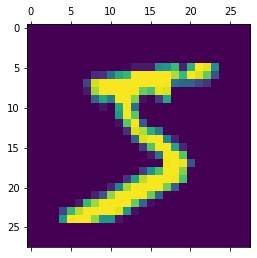

In [16]:
# plotting the 1st training image
plt.matshow(X_train[0])

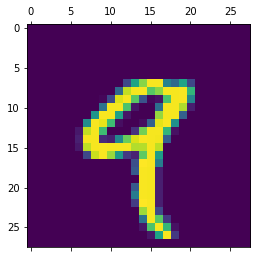

In [17]:
plt.matshow(X_train[4])

In [18]:
y_train[2]

4

In [19]:
 y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
# Scaling our dataset to improve the accuracy score
X_train = X_train / 255
X_test = X_test / 255

In [28]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
# Now we have to flatten our 2D array and convert into a matrix or a 1D array having 28*28 elements. For flattening our dataset, we will use reshape() function.
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
X_train_flattened.shape

(60000, 784)

Here 60000 is our number of examples and 784 is the dimension of 1D array.

In [31]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [32]:
# Here's the 1D representation of our first training sample
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
# creating a simple neural network with 784 input neurons and 10 output neurons.
model = keras.Sequential([
                          keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
            
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# training our model on the training set
model.fit(X_train_flattened, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.7210 - accuracy: 0.8153
Epoch 2/5
1875/1875 [==============================] - 2s 832us/step - loss: 0.3080 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.2855 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 857us/step - loss: 0.2746 - accuracy: 0.9224
Epoch 5/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.2686 - accuracy: 0.9254


Here our accuracy came out to be quite good but in case the accuracy is low, we have to scale our training set i-e, our values lie between 0-255, so we will write the following code after loading the dataset:
X_train = X_train/255
X_test = X_test/255
We did scaling above in our code.

In [34]:
# Now evaluating the accuracy on the test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 687us/step - loss: 0.2671 - accuracy: 0.9255


[0.26708850264549255, 0.9254999756813049]

So, our model looks pretty good and has accuracy score of about 92%

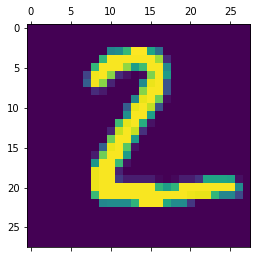

In [41]:
plt.matshow(X_test[1])

In [43]:
# Now we will do prediction of sample images
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([3.4106773e-01, 9.0811551e-03, 9.9944121e-01, 3.9577863e-01,
       5.6527827e-10, 8.5053867e-01, 8.4032267e-01, 1.0104316e-12,
       2.3751631e-01, 1.6891356e-09], dtype=float32)

So we see that we obtained 10 output scores and we have to have to check the max score for which we will use argmax function of numpy to get the index of the predicted value

In [44]:
np.argmax(y_predicted[1])

2

In [46]:
y_predicted_labels = [ np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [47]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [48]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    4,    7,    3,    3,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,   11,  924,   19,    7,    3,   12,   10,   40,    3],
       [   1,    0,   18,  934,    0,   16,    2,   10,   23,    6],
       [   1,    1,    5,    1,  916,    0,   10,    4,   11,   33],
       [   9,    4,    4,   48,   11,  751,   12,    8,   39,    6],
       [   9,    3,    7,    1,    7,   12,  914,    2,    3,    0],
       [   1,    9,   21,    9,    7,    0,    0,  949,    2,   30],
       [   3,   11,    6,   25,    9,   18,    8,   11,  877,    6],
       [   9,    7,    2,   12,   30,    7,    0,   20,    8,  914]],
      dtype=int32)>

Text(69.0, 0.5, 'True')

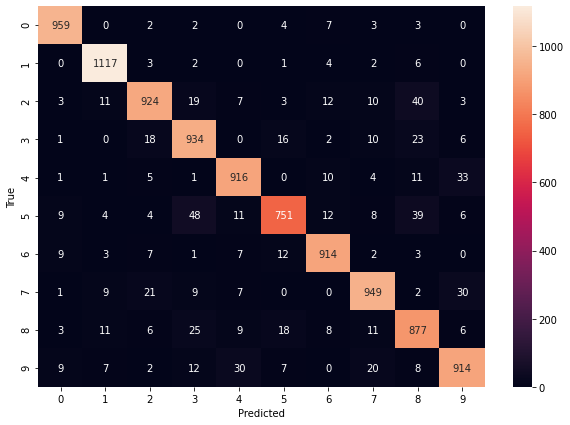

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

This confusion matrix shows that 959 times our label was 0 and our model predicted it to be zero and so on and the non-diagonal values are all errors because our model's prediction was different from the labels

In [53]:
# introducing a hidden layer in our neural network as it improves model performance
model = keras.Sequential([
                          keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
            
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# training our model on the training set
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4496 - accuracy: 0.8716
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1380 - accuracy: 0.9613
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0900 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0657 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0539 - accuracy: 0.9829


In [56]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9771


[0.07285057753324509, 0.9771000146865845]

So, we see that our model with a hidden layer has a better performance than without hidden layer.

Text(69.0, 0.5, 'True')

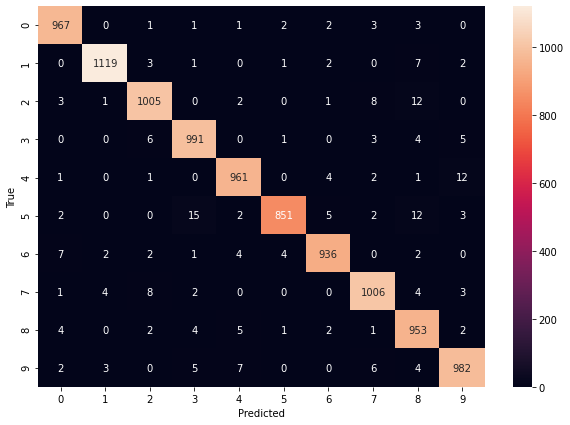

In [58]:
# Now, again plotting the confusion matrix

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [ np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
